In [12]:
# import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


### Background work

In [7]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

In [ ]:

df = sm.datasets.get_rdataset('flights', 'nycflights13').data
df.info()


In [14]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 1).
    predictions = np.dot(inputs, np.transpose(W))

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.sum((diff)**2)/m

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

    # Compute the gradient
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = np.dot(diff,inputs)/m

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

  return np.array(weights), np.array(losses)

## Machine Learning Flow
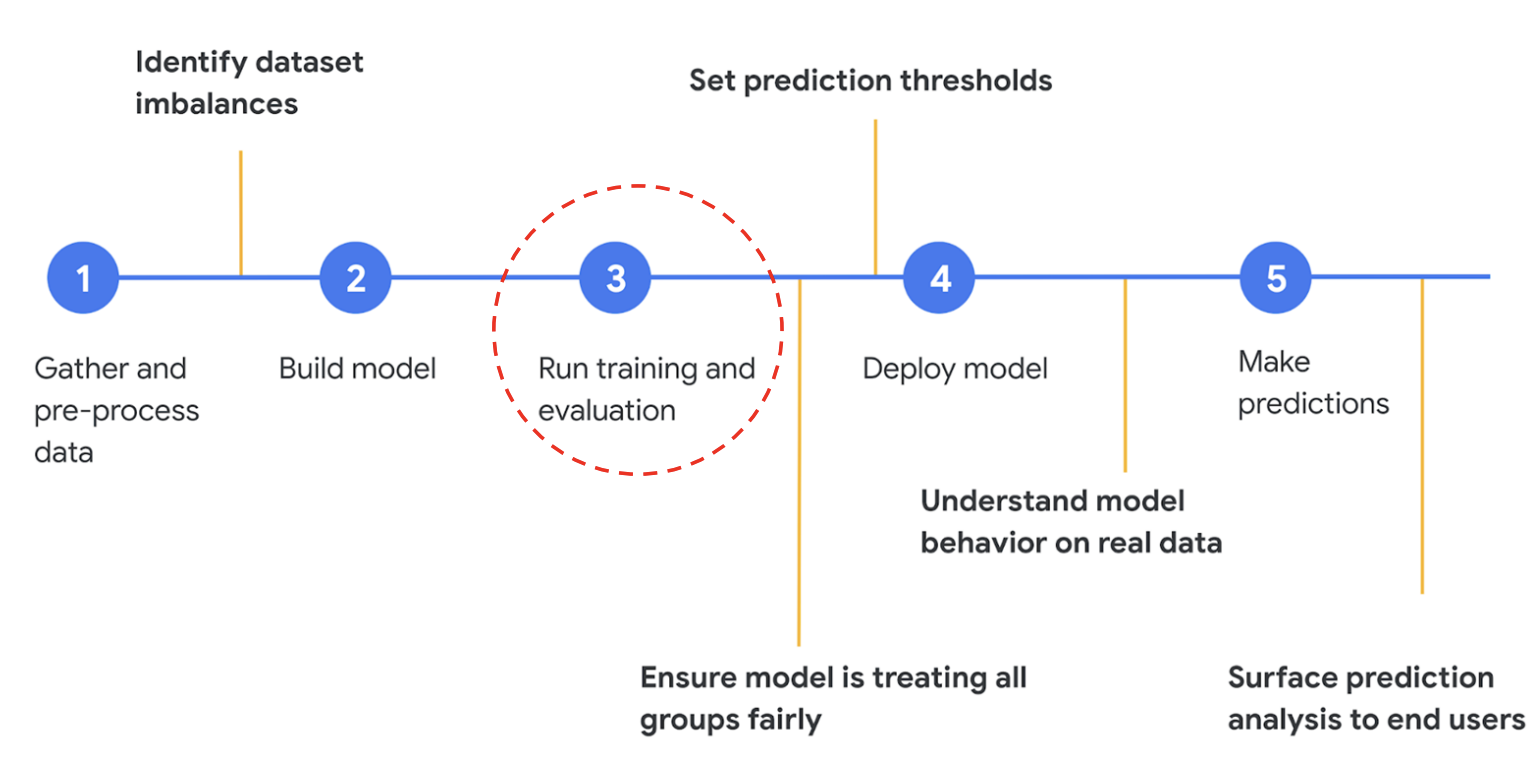

## Linear and Logistic Regression

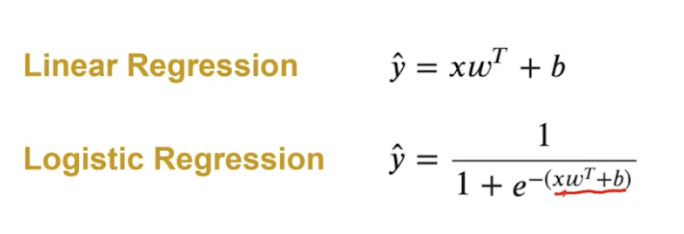

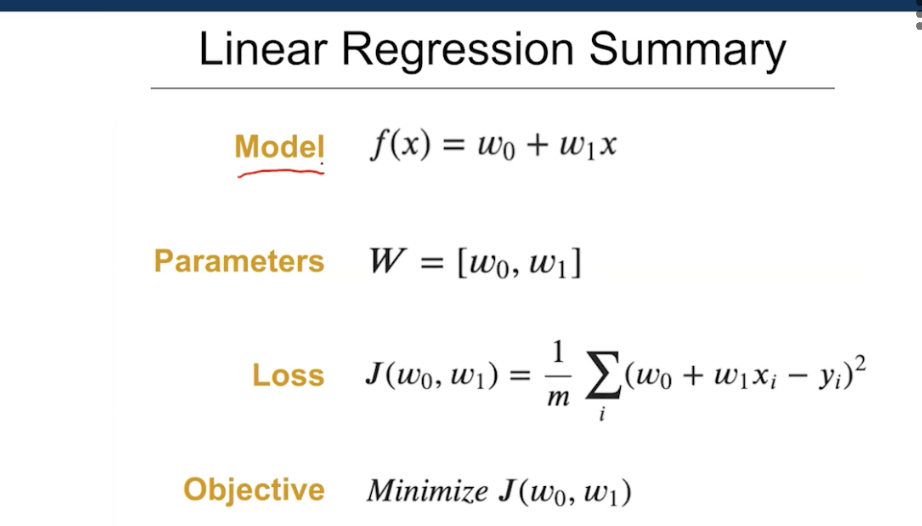

## Evaluation Metrics



### MSE
Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}


### MSE Calculator

In [9]:
#mean_squared_error(Y_label, Y_pred)

#example
X, Y_label = create_1d_data()
Y_pred = X + 5

print("Y_Label: ",Y_label)
print("Y Predictions: ",Y_pred)
print("MSE: ",mean_squared_error(Y_label,Y_pred))

#Your stuff

Y_Label:  [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]
Y Predictions:  [ 5  6  7  8  9 10 11 12 13 14]
MSE:  6.839502909434264



### Log Loss (binary cross-entropy)
 we need a loss function for logistic regression that's appropriate for classification. The *Log Loss* (also known as *binary cross-entropy*), is defined as follows:

\begin{equation}
-\frac{1}{|Y|} \sum_{y_i \in Y}y_i log(\hat{y}_i) + (1−y_i)log(1−\hat{y}_i)
\end{equation}

Recall that $y_i$ is the label for example $i$ and $\hat{y_i}$ is the predicted probability (of the positive class) for example $i$. Note that only the first term in the sum is active for positive examples (the second term is 0 when $y_i = 1$) and only the second term in the sum is active for negative examples (the first term is 0 when $y_i = 0$).

The log loss is differentiable, allowing us to compute gradients and run SGD. It also happens to be convex, which guarantees that SGD (with a suitable learning rate) will produce a global minimum.

### Log Loss Calculator

In [ ]:
# log_loss(Y_label,Y_pred)

## Classification Metrics

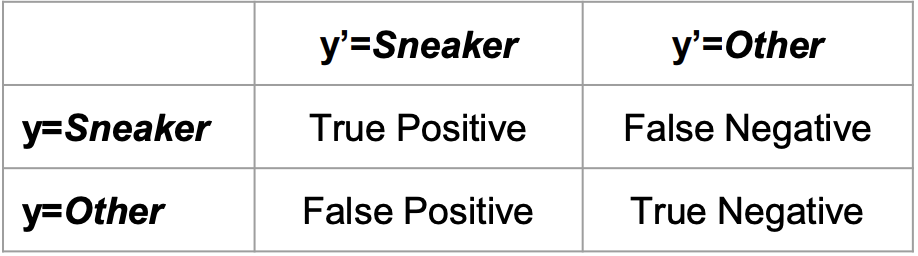

False positives are in the column. False negatives are in the row.

### Accuracy

(TP + TN) / (TP + TN + FP + FN)

### Precision

TP / (TP + FP)

### Recall
TP / (TP + FN)

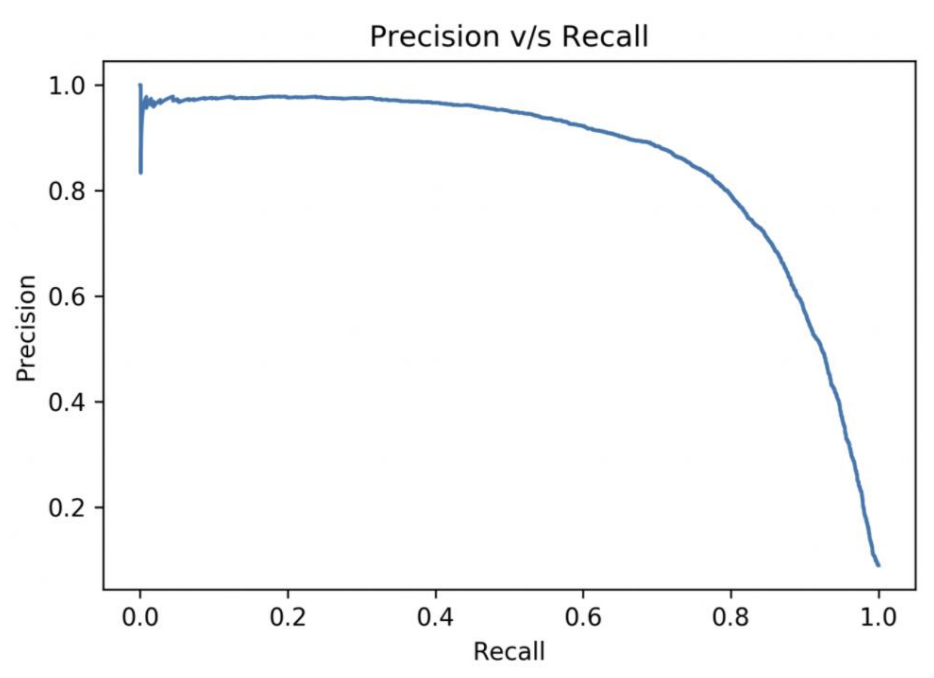

## Gradient Descent
Here we'll demonstrate gradient descent for linear regression to learn the weight vector $W$. We'll use the more specific notation $h_W(x)$ since we want to specify that $h$ is parameterized by $W$. As above, we'll assume that $x_0=1$ so we can write $h$ as a sum or a matrix product:

\begin{align}
h_W(x) = \sum_{i=0}^{n-1} w_i x_i = x W^T
\end{align}

In the derivation that follows, we'll use summations, but in the code below, we'll use matrix computations.

In linear regression, we compute the loss, $J(W)$ from the mean squared difference between predictions $h_W(x)$ and targets $y$. In the following equation, we average the loss over each of the $m$ training examples.

\begin{align}
J(W) = \frac{1}{2m} \sum_{i=0}^{m-1} (h_W(x^{(i)}) - y^{(i)})^2
\end{align}

Dividing by $2$ simplifies the formula of the gradient, since it cancels out the constant $2$ from by the derivative of the squared term (see below). Remember that the gradient is a vector of partial derivatives for each $w_j$ (holding the other elements of $w$ constant). The gradient points in direction of steepest ascent for the loss function $J$.

Here we derive the parameter update rule by computing the gradient of the loss function. We need a derivative for each feature in $x$, so we'll show how to compute the derivative with respect to $w_j$. For simplicity, let's assume we have only one training example ($m = 1$):

\begin{align}
\frac{\partial}{\partial w_j} J(W) &= \frac{\partial}{\partial w_j} \frac{1}{2} (h_W(x) - y)^2 \tag{1}\\
&= 2 \cdot \frac{1}{2} (h_W(x) - y) \cdot \frac{\partial}{\partial w_j} (h_W(x) - y) \tag{2}\\
&= (h_W(x) - y) \frac{\partial}{\partial w_j} \left(\sum_{i=0}^{n-1} w_i x_i - y \right) \tag{3}\\
&= (h_W(x) - y)x_j \tag{4}
\end{align}

The derivation has 2 key steps:

(1) Apply the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) (step 1 -> 2).

(2) The derivative with respect to $w_j$ of $h_W(x)$ is only non-zero for $w_j x_j$. For this component, the derivative is $x_j$ since the feature value is treated as a constant (step 3 -> 4).

Ok, that's it. We can now implement gradient descent for linear regression. The only difference in the code below is that it computes the loss as an average over all training examples (rather than just a single example).

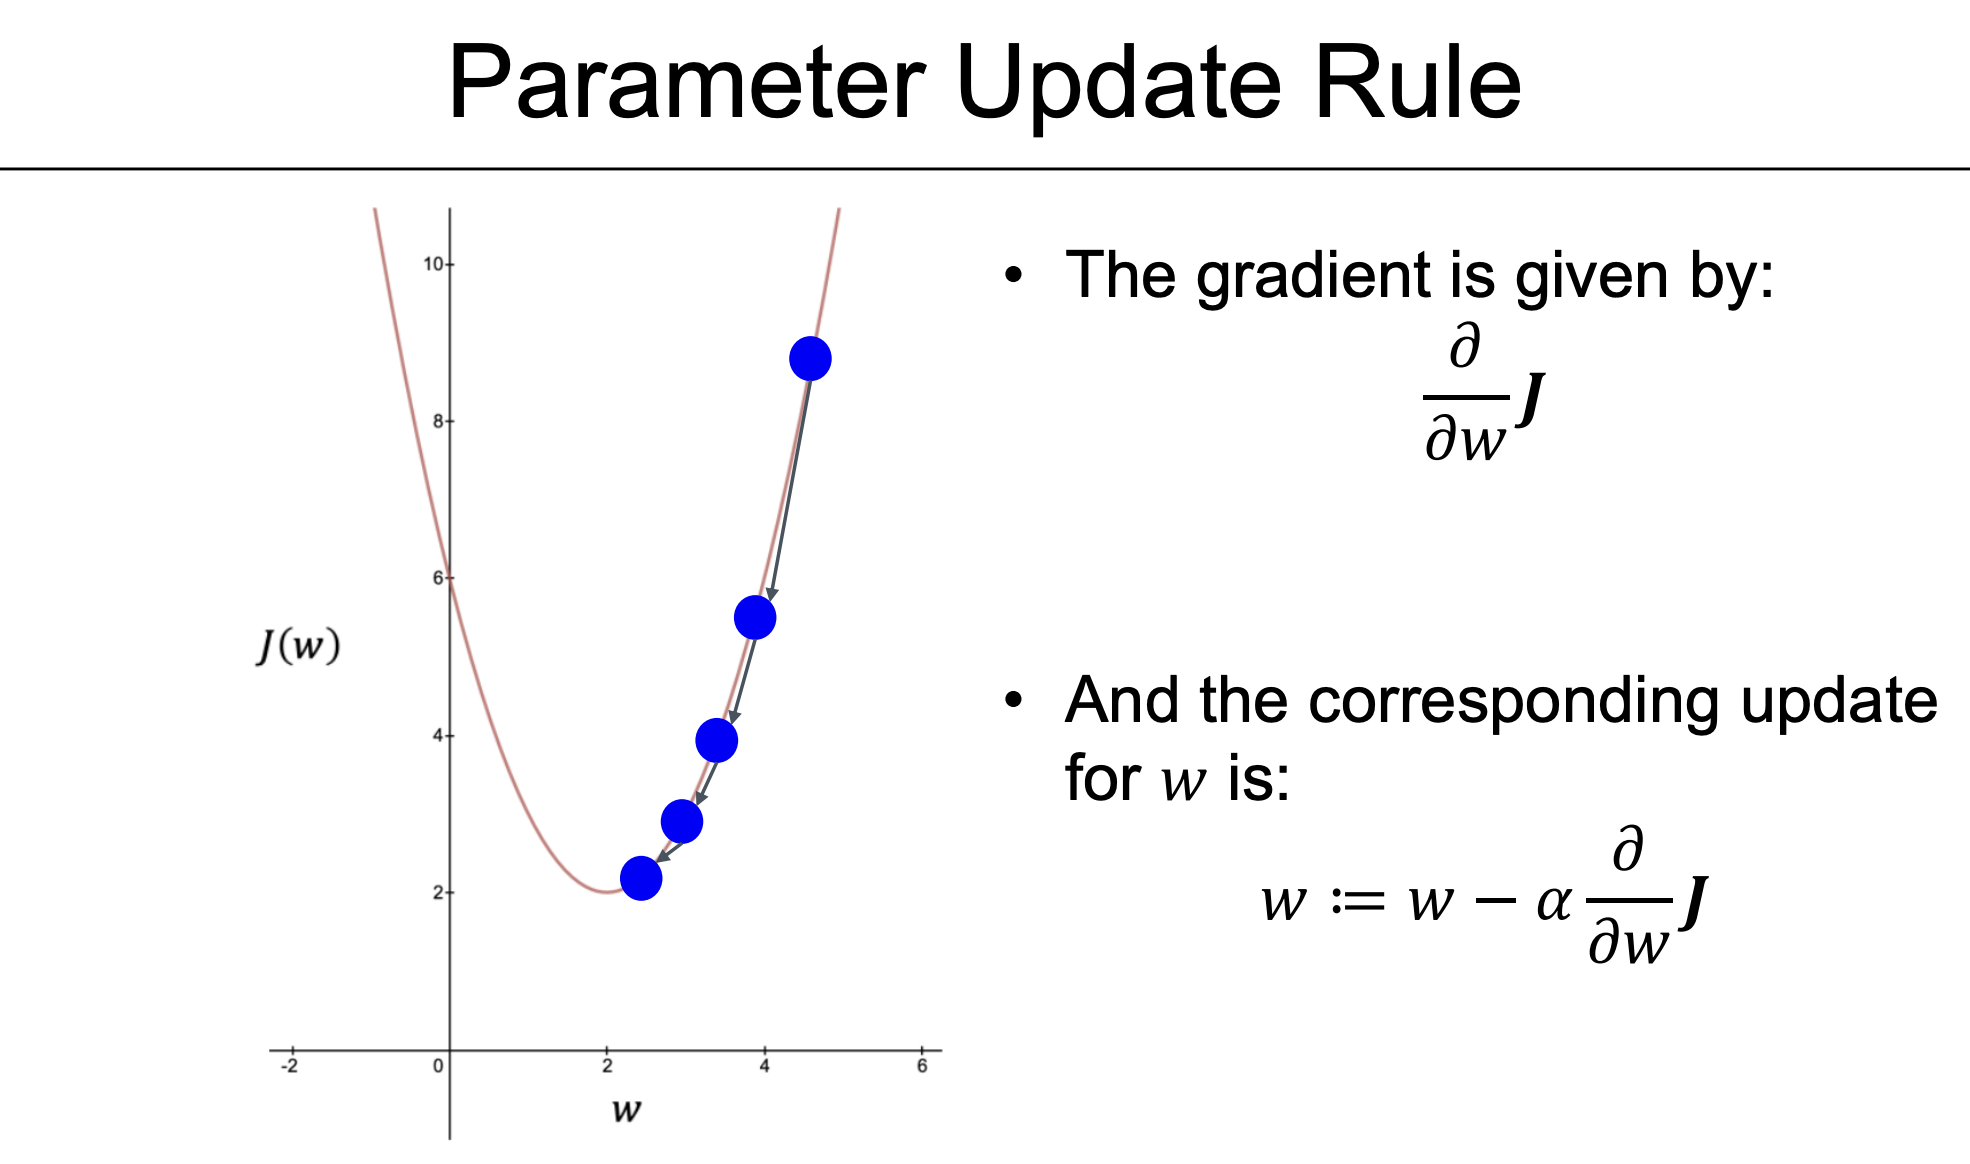

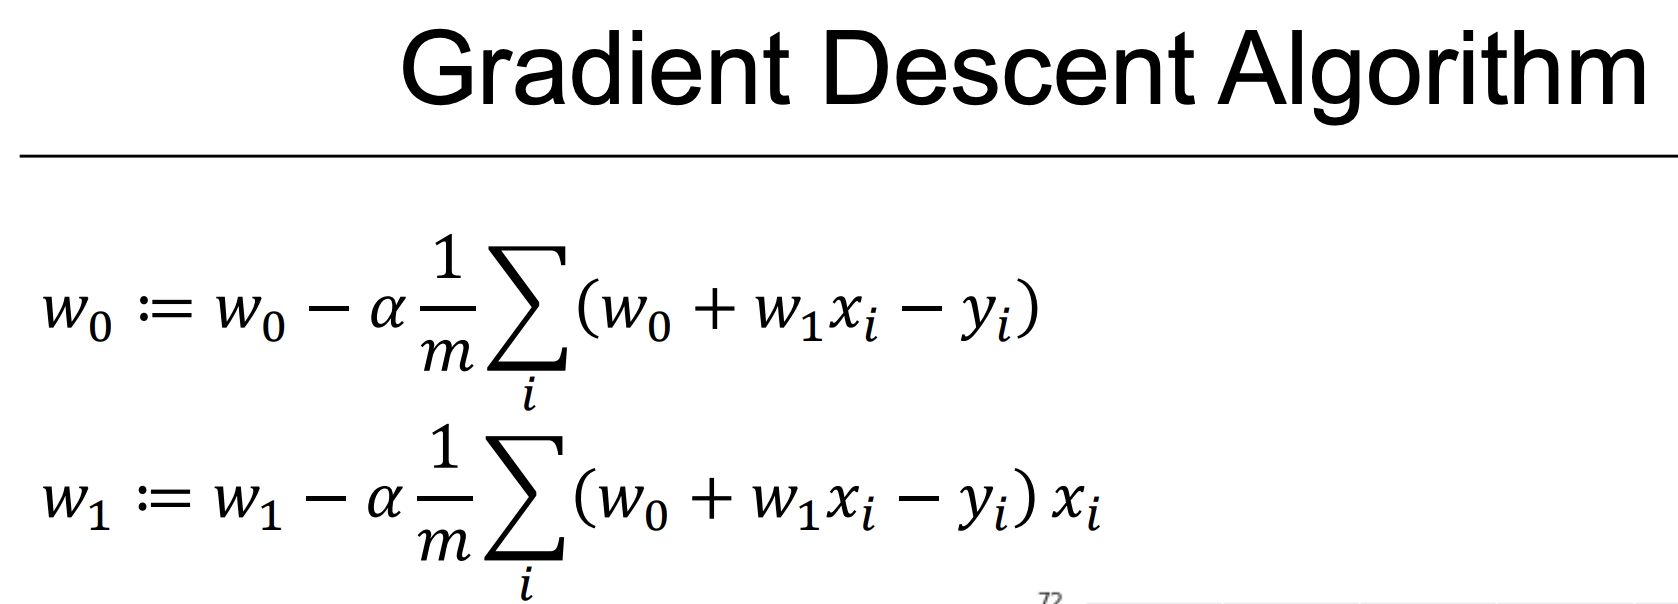

### Gradient Descent Calculator

In [ ]:
#gradient_descent(inputs, outputs, learning_rate, num_epochs):

## Activation Functions

### Linear Activation Function
AKA Identify Function

Cons:
* It’s not possible to use backpropagation as the derivative of the function is a constant and has no relation to the input x.
* All layers of the neural network will collapse into one if a linear activation function is used. No matter the number of layers in the neural network, the last layer will still be a linear function of the first layer. So, essentially, a linear activation function turns the neural network into just one layer.

### sigmoid
Pros:
* It is commonly used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice because of its range.
* The function is differentiable and provides a smooth gradient, i.e., preventing jumps in output values. This is represented by an S-shape of the sigmoid activation function.
Cons:
* The output of the logistic function is not symmetric around zero. So the output of all the neurons will be of the same sign. This makes the training of the neural network more difficult and unstable.

### tanh
Pros:
* The output of the tanh activation function is Zero centered; hence we can easily map the output values as strongly negative, neutral, or strongly positive.
* Usually used in hidden layers of a neural network as its values lie between -1 to; therefore, the mean for the hidden layer comes out to be 0 or very close to it. It helps in centering the data and makes learning for the next layer much easier.
Cons:
* As you can see— it also faces the problem of vanishing gradients similar to the sigmoid activation function. Plus the gradient of the tanh function is much steeper as compared to the sigmoid function.

### ReLU
Pros:
* Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh functions.
* ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property.
Cons:
* The negative side of the graph makes the gradient value zero. Due to this reason, during the backpropagation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated.

### Softmax
Pros:
* Ideal for multiclass classification problems

## HW Reviews

### chapter 1
* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.

### chapter 2
* We store our data in arrays where **each row is an input example** $x^{(i)}$ and **each column is a feature**. Training example $x^{(i)}$ corresponds to training label $y^{(i)}$.
* **Gradient descent** is an **optimization process** that **minimizes loss** $J(W)$ where $W$ is a set of parameters (or weights). The loss measures the difference between  predictions $\hat{Y}$ using the current values of $W$ and the target labels $Y$, and gradient descent updates $W$ by taking a **step in the direction of the loss gradient**.
* Each pass over the training data by the gradient descent algorithm is called an **epoch**. The algorithm has no specific stopping point, but we often choose to stop when the parameter values have **converged**, that is, the change in values in the next step are less than some small $\epsilon$.

### chapter 3

* The **[Pandas](https://pandas.pydata.org/) library** is very useful for manipulating datasets and works well with numpy.
* Use a random split into train and test data and measure performance on the test data, starting from a simple **baseline**.
* Examine data using histograms and correlations to help build intuition before training any models.
* **Tensorflow** works by first building a **computational graph**; then, you can pass data through the graph to produce predictions, updating parameters via gradient descent in training mode; we use the **Keras API** to easily configure models.
* Training is often quite sensitive to the **learning rate** hyperparameter, and feature normalization is an important strategy to avoid differences in the scale of the feature derivatives (gradient) that can make learning impossible.

## Sync Reviews

* A model is a learned function that predicts outputs y from inputs x.

* A loss function compares predictions to labels.

* Test data is useful for assessing generalization.

* A baseline should help ground expectations for modeling experiments.

* Modern machine learning typically uses Numerical optimization

* The input to the loss function is a mapping of parameters to values.

* The loss function for any training data is not necessarily minimized when its value is 0. It can be minimized at a higher value.

* Gradient descent does not always converge.

* The gradient is computed separately for each parameter.

* With n features and m training examples, the shape of the gradient should be (m,1)

* True or false? Linear regression requires numeric inputs.

* A categorical feature with 10 possible values produces a one-hot representation with 10 features.

* Z-Score scaling can significantly improve training convergence speed.

* MAE for car price prediction could be improved simply by clipping negative predictions to 0.

* Linear regression can be applied to binary-valued labels.

* The logistic function maps any real-valued number to the probability scale.

* For a given model, different values of the classification threshold will not always produce the same accuracy.

* Log loss is undefined when |y-y'|=1.

* The correct answer to the functional form for logistic regression in terms of y, x, and the parameters W and b is y = 1/(1+e^-(xW+b))

* As you adjust the classification threshold, when precision increases, recall will not increase too. Increasing the threshold will reduce the number of False positives. However, Recall depends on False Negatives.

* In a multiclass logistic regression model, each class has its own set of parameters.

* Cross-entropy loss is not only valid when the label distribution is one-hot.

* Logistic regression output can be computed with a single matrix multiplication (and a sigmoid).

* A linear model must rely on handcrafted input features if it is to understand complex structure.

* A model trained for the MNIST digit classification task could not be applied directly to mail sorting by zip code.

* With inputs X1 and X2, the neurons in the first layer can only learn diagonal lines.

* Computing the gradient of the loss in a neural network involves a partial derivative for just the parameters in the last layer.
	False
* Back propagation allows us to compute a partial derivative for all parameters using the chain rule.

* Neural networks do need nonlinearities to learn nonlinear functions.

* Both ANNs and brains appear to arrange neurons in layers, with sensitivity to increasingly complex patterns.